In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
#from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lab606a/.virtualenvs

In [2]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print("shape of x_train", x_train.shape)
    print("shape of y_train", y_train.shape)
    print("shape of x_test", x_test.shape)
    print("shape of y_test", y_test.shape)
    number = 10000
    x_train = x_train[0:number]
    y_train = y_train[0:number]
    x_train = x_train.reshape(number, 28*28)
    x_test = x_test.reshape(x_test.shape[0], 28*28)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    ## convert class vectors to binary class matrices
    ## y_train and y_test doing one-hot-encoding by np_utils.to_categorial()
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    x_train = x_train
    x_test = x_test
    print("converted shape of x_train", x_train.shape)
    print("converted shape of y_train", y_train.shape)
    print("converted shape of x_test", x_test.shape)
    print("converted shape of y_test", y_test.shape)
    
    #normalization
    x_train = x_train / 255
    x_test = x_test /255
    
    ## add noise
    #x_test = np.random.normal(x_test)
    
    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()
## mnist input training data size:60000
## mnist input testing data size:10000

shape of x_train (60000, 28, 28)
shape of y_train (60000,)
shape of x_test (10000, 28, 28)
shape of y_test (10000,)
converted shape of x_train (10000, 784)
converted shape of y_train (10000, 10)
converted shape of x_test (10000, 784)
converted shape of y_test (10000, 10)


In [4]:
model = Sequential()

## input layer
model.add(Dense(input_dim=28*28, units=512, activation='sigmoid'))
#model.add(Dropout(0.5)) # when noise comes can try droout

## hidden layer
model.add(Dense(units=512, activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(units=512, activation='sigmoid'))
#model.add(Dropout(0.5))
#for i in range(10):
    #model.add(Dense(units=512, activation='sigmoid'))

## output layer
model.add(Dense(units=10, activation='softmax'))

In [5]:
#model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=100, epochs=20)

result = model.evaluate(x_train, y_train, batch_size=100)
print ('\nTraining accuracy:', result[1])

result = model.evaluate(x_test, y_test, batch_size=100)
# result[0]=Total loss, result[1]=Accuracy
print ('\nTest accuracy:', result[1])

Epoch 1/20
10000/10000 [==============================] - 1s 84us/step - loss: 1.4026 - acc: 0.5421
Epoch 2/20
10000/10000 [==============================] - 0s 30us/step - loss: 0.4004 - acc: 0.8861
Epoch 3/20
10000/10000 [==============================] - 0s 34us/step - loss: 0.2990 - acc: 0.9122
Epoch 4/20
10000/10000 [==============================] - 0s 25us/step - loss: 0.2518 - acc: 0.9240
Epoch 5/20
10000/10000 [==============================] - 0s 44us/step - loss: 0.2161 - acc: 0.9362
Epoch 6/20
10000/10000 [==============================] - 0s 46us/step - loss: 0.1889 - acc: 0.9439
Epoch 7/20
10000/10000 [==============================] - 0s 44us/step - loss: 0.1717 - acc: 0.9458
Epoch 8/20
10000/10000 [==============================] - 0s 44us/step - loss: 0.1497 - acc: 0.9541
Epoch 9/20
10000/10000 [==============================] - 0s 29us/step - loss: 0.1325 - acc: 0.9604
Epoch 10/20
10000/10000 [==============================] - 0s 38us/step - loss: 0.1154 - acc: 0.9647

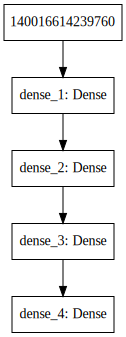

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))